# Plotting with Matplotlib

Matplotlib is a standard plotting library of python. We begin by importing it first along with numpy.

In [22]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

The most widely used function in `matplotlib` is plot, which allows you to plot 1D and 2D data. Here is a simple example:

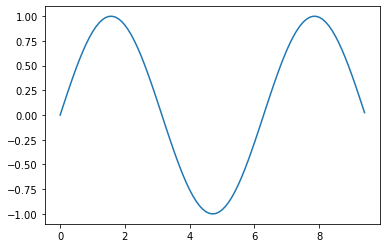

In [2]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

We can easily customize the style of plots for poster/talk/paper

In [3]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


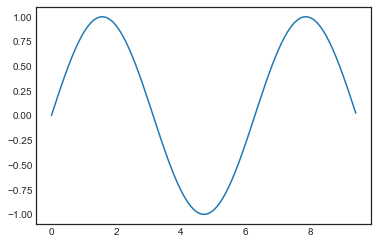

In [4]:
plt.style.use(['seaborn-white'])
plt.plot(x, y)

if we want to customize plots it is better to plot by first defining fig and ax objecs which have manuy methods for customizing figure resolution and plot related aspects respecticely. 

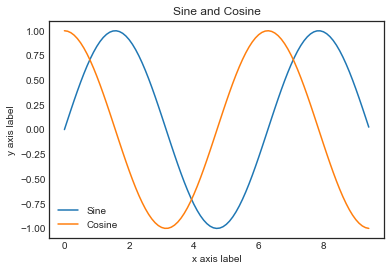

In [5]:
fig, ax = plt.subplots()

y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
ax.plot(x, y_sin)
ax.plot(x, y_cos)

# Specify labels
ax.set_xlabel('x axis label')
ax.set_ylabel('y axis label')
ax.set_title('Sine and Cosine')
ax.legend(['Sine', 'Cosine'])

#fig.savefig("myfig.pdf")

## A gallery of useful examples

**For a greater variety of plotting examples check out [Matploltib Gallery!](https://matplotlib.org/3.1.1/gallery/index.html)**

1D plotting is conveniently done by creating fig and ax objects which allow coutom styling plots and figure properties separately. 

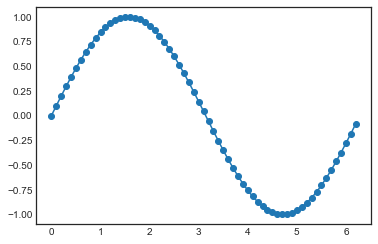

In [6]:
fig, ax = plt.subplots()          # Create fig and ax objects

t = np.arange(0.0,  2*np.pi, 0.1) # create x values via np.arange or np.linspace

s = np.sin(t)                     # create y values

ax.plot(t, s, '-o')                     # make the plot

#fig.savefig('myFIG.png')         # save figure

#### fig and ax objects
For customizing plots it is more convenient to define **fig** and **ax** objects.  One can then use ax object to make veriety of subplots then use fig to save the entire figure as one pdf. Try changing fig size, number of columns and rows.

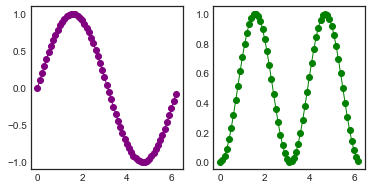

In [7]:
t = np.arange(0.0,  2*np.pi, 0.1) # create x values
s = np.sin(t)                     # create y values

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(6,3))          

ax[0].plot(t, s,'-o', color='purple', lw=1.0)  # plot on subplot-1
ax[1].plot(t, s**2,'-o', color='green',  lw=1.0)  # plot  on subplot-2

#fig.savefig('sd.png')             # save the figure

### Plotting in 2D

To make 2D plots we need to generate 2D grid $(x,y)$ of points and pass it to our function $f(x,y)$

$$f(x,y) = sin(x) \cdot cos(x) \,\,\,$$

<ipython-input-8-5871cfed40af>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolor(X, Y, Z,cmap='RdBu')                  # plot


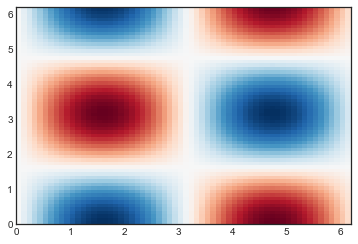

In [8]:
x = np.arange(0.0,  2*np.pi, 0.1)   # create x values
y = np.arange(0.0,  2*np.pi, 0.1)   # create y values

X, Y = np.meshgrid(x,y)             # tunring 1D array into 2D grids of x and y values

Z = np.sin(X) * np.cos(Y)           # feed 2D grids to our 2D function f(x,y)

fig, ax = plt.subplots()            # Create fig and ax objects
ax.pcolor(X, Y, Z,cmap='RdBu')                  # plot 

# try also ax.contour, ax.contourf

### 3D plots with matplotlib

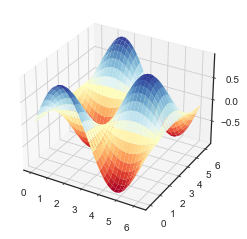

In [9]:
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

# Create fig and ax objects for 3d plotting
fig = plt.figure()
ax = fig.add_subplot(projection='3d')  

# Using X,Y,Z grid of points in previous step 
ax.plot_surface(X, Y, Z, cmap='RdYlBu')

### Plotting histograms with matplotlib

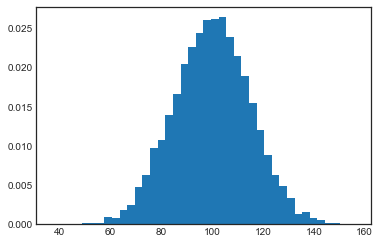

In [10]:
fig, ax = plt.subplots()

# Make up some random data
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# Plot 1D histogram of the data
hist = ax.hist(x, bins=40, density=True)

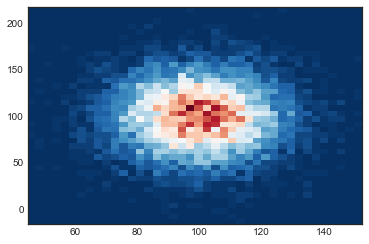

In [11]:
fig, ax = plt.subplots()

# Make up some random data
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)
y = mu + 2*sigma * np.random.randn(10000)

# Plot 2D histogram of the data
hist = ax.hist2d(x, y, bins=40, density=True, cmap='RdBu_r')

### Plotting histograms with seaborn

For visualizing statistical plots there is a specialized library build on top of matplotlib that simplifies many intermediate steps that are needed to go from data to beautiful and polished visualization. 

- [Seaborn](https://seaborn.pydata.org/index.html)

In [12]:
import seaborn as sns
from scipy import stats

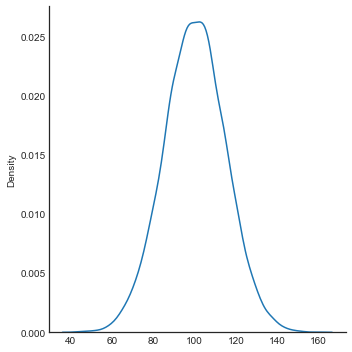

In [13]:
# Make up some random data
mu, sigma = 100, 15

x = mu + sigma * np.random.randn(10000)

sns.displot(x, kind="kde")

## Pandas and seaborn! a power couple for multivariate statistics visualization

In [66]:
# Normal distribution of points 
n_points=200

df = pd.DataFrame({ 'X':    1*np.random.randn(n_points), 
                    'Y':    5*np.random.randn(n_points), 
                    'Z':    1+5*np.random.randn(n_points),
                    'time': np.linspace(0,n_points,n_points)
                  })

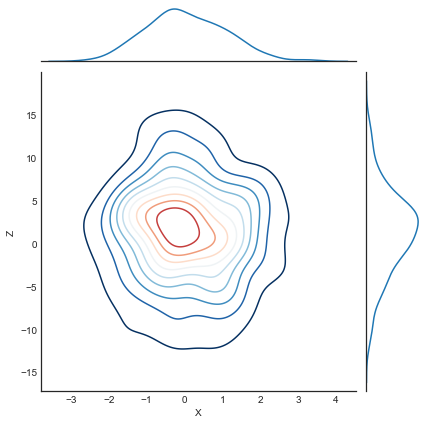

In [67]:
sns.jointplot(data=df, x='X', y='Z',
              kind="kde", cmap='RdBu_r')

## Interactive plots

### Using widgets

Suppose we would like to explore how the variation of parameter $\lambda$ affects the following function of a standing wave:

$$
f(x) = sin \Big(\frac{2\pi x}{\lambda}\Big)
$$

**Step 1** Make a python-function which creates a plot as a function of a parameter(s) of interest.

**Step 2** Add an interactive widget on top to vary the parameter.

In [68]:
from ipywidgets import widgets

In [69]:
@widgets.interact(L=(1,12))    # Vary between 0.2 and 20

def wave(L=1):          # We make default value equal to 1
    
    x=np.linspace(-10,10,1000)
        
    f = np.sin(2*np.pi*x/L)
        
    plt.plot(x,f, lw=2, color='blue')

interactive(children=(IntSlider(value=1, description='L', max=12, min=1), Output()), _dom_classes=('widget-int…

## More interactiviy via  Plotly-express

- [Plotly](https://plotly.com/python/) is large multi-language  interactive graphing library that covers Python/Julia/R. 

- [Plotly-dash](https://dash.plotly.com/introduction) is a framework for building web dashborads with itneractive plotly graphs.

- [Plotly-express](https://plotly.com/python-api-reference/plotly.express.html) is a high level library for quick visualizations whihc is similiar to seaborn vs matploltib in its philosophy

> Check out [this cool website](https://biapss.chem.iastate.edu/) built using Dash-Plotly

In [70]:
import plotly.express as px

In [71]:
px.density_heatmap(df, x='X', y='Y')
#px.line(df, x='X', y='Y')
#px.scatter(df, x='X', y='Y')
#px.area(df, x='X', y='Y')
#px.histogram(df, x="X")

In [74]:
fig = px.scatter(df, x="X", y="Y", size=20*np.ones(n_points), 
                 animation_frame="time", animation_group='Y', color='Y',
                 range_x=[-20,20], range_y=[-20,20]
                 )
fig.show()

## Additional resoruces. 

Matplotlib has a huge scientific user base. This means that you can always find a good working template of any kind of visualization which you want to make. With basic understanding of matplotlib and some solid googling skills you can go very far. Here are some additional resources that you may find helpful

- [Matplotlib](https://matplotlib.org/index.html)

- [Matplotlib gallery](https://matplotlib.org/3.1.1/gallery/index.html)

- [Matplotlib Blog](https://matplotlib.org/matplotblog/)

- [PyViz universe](https://pyviz.org/index.html)

- [The Python Graph Gallery](https://python-graph-gallery.com/)

- [Plotly documentaiton](https://plotly.com/python/)